In [1]:
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py

In [2]:
from numpy import genfromtxt
Y = genfromtxt("/data1/face_expressions/Labels/Training_emotios.csv", delimiter=None,skip_header=1)
import random
np.random.seed(22)
idx = np.random.choice(Y.shape[0], int(np.floor(len(Y)*.85)), replace=False)
print(idx)
len(idx)
Y_train=Y[idx]
Y_vaild=np.delete(Y, idx, axis=0)

#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
#few disgust only 1.5% rest is more or less balanced

[ 5044 14775  6036 ...,  7689 24842   300]


(array([ 3995.,   436.,  4097.,  7215.,  4830.,  3171.,  4965.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

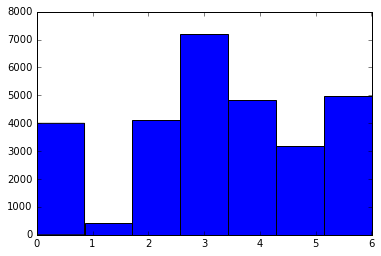

In [3]:
plt.hist(Y,bins=7)

(array([ 3379.,   377.,  3470.,  6148.,  4109.,  2691.,  4228.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

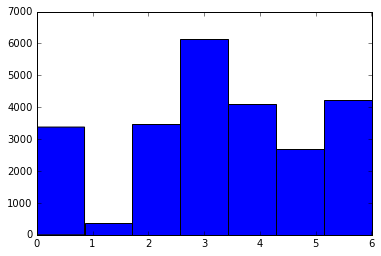

In [4]:
plt.hist(Y_train,bins=7)

(array([  616.,    59.,   627.,  1067.,   721.,   480.,   737.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

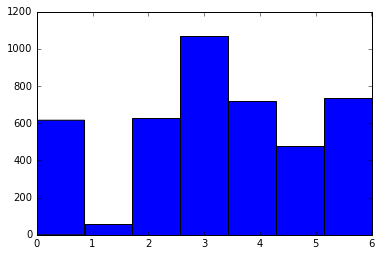

In [5]:
plt.hist(Y_vaild,bins=7)

In [6]:
h5f_X = h5py.File('/data1/face_expressions/hdf5_face_expressions/Train.hdf5', 'r')
print(h5f_X.keys())
print(h5f_X.keys()[0])
print(h5f_X.keys()[1])
print(h5f_X.keys()[2])
print(h5f_X.keys()[3])
X_train = h5f_X['X_faces_expressions_train']
print(X_train.shape)
Y_train = h5f_X['Y_face_expressions_train']
print(Y_train.shape)
X_valid = h5f_X['X_faces_expressions_valid']
print(X_valid.shape)
Y_valid = h5f_X['Y_face_expressions_valid']
print(Y_valid.shape)

[u'X_faces_expressions_train', u'X_faces_expressions_valid', u'Y_face_expressions_train', u'Y_face_expressions_valid']
X_faces_expressions_train
X_faces_expressions_valid
Y_face_expressions_train
Y_face_expressions_valid
(24402, 48, 48, 1)
(24402, 7)
(4307, 48, 48, 1)
(4307, 7)


In [7]:
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_valid = (X_valid - X_mean ) / (X_std + 0.0001)

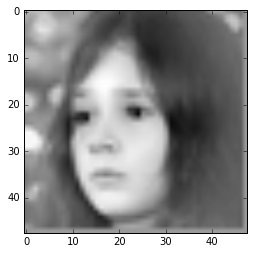

In [8]:
plt.imshow(X_train[50,:,:,0],cmap="gray")

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [10]:
batch_size = 128
nb_classes = 7
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 48, 48
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)

In [11]:
Y_train[0]
Y_valid[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [12]:
import keras
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180.,
    zoom_range=0.2)

In [14]:
model = Sequential()

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='valid',
                        input_shape=input_shape))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes))
model.add(BatchNormalization())# added not tut
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
datagen.fit(X_train)
history=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                    nb_epoch=5,
                    samples_per_epoch=len(X_train),
                    verbose=1, 
                    validation_data=(X_valid, Y_valid))

Epoch 1/5


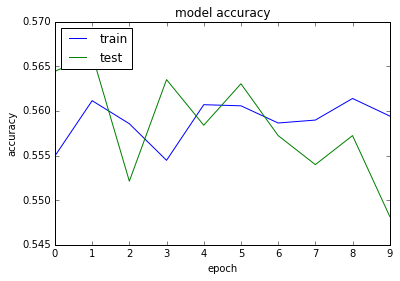

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

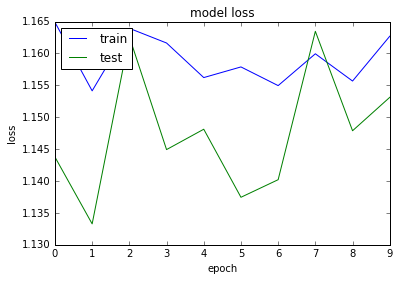

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()